In [1]:


%load_ext autoreload
%autoreload 2
import os
import argparse
import torch
import json

from artnet import ArtNet
from utils import *

import matplotlib.pyplot as plt

os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

COLOR_adadiff = 'orange'
COLOR_adam = 'blue'
COLOR_ada = 'red'
COLOR_adamdiff = 'magenta'

def parse_args():
    """Parse parameters."""
    parser = argparse.ArgumentParser()

    # directory
    parser.add_argument('--style_path', type=str,
                        default="D:/Gitte_Belly/Desktop/test/neural-style-pytorch-master/neural-style-pytorch-master/styles/", help='path to style images')
    parser.add_argument('--content_path', type=str,
                        default="D:/Gitte_Belly/Desktop/test/neural-style-pytorch-master/neural-style-pytorch-master/contents/", help='path to content images')
    parser.add_argument('--output_path', type=str,
                        default="D:/Gitte_Belly/Desktop/test/neural-style-pytorch-master/neural-style-pytorch-master/outputs/", help='path to output images')

    # hyperparameters settings
    parser.add_argument('--lr', type=float, default=0.01,
                        help='default learning rate')
    parser.add_argument('--mode', type=str, default="single",
                        help='mode for training')
    parser.add_argument('--epochs', type=int, default=71,
                        help='number of epochs to train')

    parser.add_argument('--content_weight', type=int,
                        default=1, help='weight of content images')
    parser.add_argument('--style_weight', type=int,
                        default=1000000, help='weight of style images')
    parser.add_argument("--model", type=str, default="vgg19",help="vgg19/vgg19_bn")

    parser.add_argument('--optimizer', type=int, default=ADADIFF,help='optimizer to use')

    parser.add_argument('--loss_tao', type=float, default=3.2, help="the threshold of loss to terminate the training")
    # parse the arguments
    args = parser.parse_known_args()

    return args



"""High level pipeline for Neural Style Transfer."""
args,_ = parse_args()

# CUDA Configurations
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


style_img = image_loader(os.path.join(
    args.style_path, "picasso.jpg")).to(device, torch.float)
content_img = image_loader(os.path.join(
    args.content_path, "dancing.jpg")).to(device, torch.float)

assert style_img.size() == content_img.size(
), "Style and Content image should be the same size"

normalization_mean = torch.tensor([0.485, 0.456, 0.406]).to(device)
normalization_std  = torch.tensor([0.229, 0.224, 0.225]).to(device)

def save_data(method: str, image, epoch, time, loss_dict, denom_dict ):
    """helper function to save data"""
    if not os.path.exists(args.output_path):
        os.mkdir(args.output_path)
    save_image(image, args.output_path)
    print(f"save image for {method}")

    dict_path = os.path.join(args.output_path, f"{method}.txt")
    denom_dict = [v.item() for v in denom_dict]
    dict = {"epoch": epoch, "time": time, "denom": denom_dict, "loss": loss_dict}
    with open(dict_path, "w") as f:
        json.dump(dict, f)
        print(f"save data for {method}")

def read_data(method: str):
    """return epoch, time, denom_dict, loss_dict"""
    dict_path = os.path.join(args.output_path, f"{method}.txt")

    with open(dict_path, "r") as f:
        dict = json.load(f)
        print(f"load data for {method}")
        
    return dict["epoch"], dict["time"], dict["denom"], dict["loss"]

In [1]:

args.model = "vgg19"
args.content_weight = 1
args.style_weight = 1000000
args.optimizer = ADADIFF

model = ArtNet(args,
                normalization_mean,
                normalization_std,
                style_img,
                content_img)

output_img, loss_dict_adadiff, epoch_adadiff, time_adadiff, denom_adadiff = model.train(content_img.clone())
print(f"testing for {args.model}, {args.optimizer}")
save_data("adadiff", output_img, epoch_adadiff, time_adadiff, loss_dict_adadiff, denom_adadiff)
# if not os.path.exists(args.output_path):
#     os.mkdir(args.output_path)
# save_image(output_img, args.output_path)

# denom_adadiff = [v.item() for v in denom_adadiff]

# file_path = os.path.join(args.output_path, "adadiff.txt")
# ada_dict = {"epoch": epoch_adadiff, "time": time_adadiff, "denom": denom_adadiff, "loss": loss_dict_adadiff}
# with open(file_path, "w") as f:
#     json.dump(ada_dict, f)
#     print("save adagraddiff")


==> Building the style transfer model ...


d:\Gitte_Belly\Desktop\test\neural-style-pytorch-master\neural-style-pytorch-master\src\utils.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.mean = torch.tensor(mean).view(-1, 1, 1)
d:\Gitte_Belly\Desktop\test\neural-style-pytorch-master\neural-style-pytorch-master\src\utils.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.std = torch.tensor(std).view(-1, 1, 1)


==> Start training ...
Epoch 0: Style Loss : 881.909973 Content Loss: 0.000000


d:\Gitte_Belly\Desktop\test\neural-style-pytorch-master\neural-style-pytorch-master\src\optimizer.py:266: UserWarning: This overload of addcdiv_ is deprecated:
	addcdiv_(Number value, Tensor tensor1, Tensor tensor2)
Consider using one of the following signatures instead:
	addcdiv_(Tensor tensor1, Tensor tensor2, *, Number value) (Triggered internally at C:\cb\pytorch_1000000000000\work\torch\csrc\utils\python_arg_parser.cpp:1519.)
  p.data.addcdiv_(-group['lr'], grad, denom)


Epoch 5: Style Loss : 342.636780 Content Loss: 2.848030
Epoch 10: Style Loss : 290.238007 Content Loss: 3.052758
Epoch 15: Style Loss : 262.800659 Content Loss: 3.192824
Epoch 20: Style Loss : 244.202301 Content Loss: 3.272678
Epoch 25: Style Loss : 229.688232 Content Loss: 3.338975
Epoch 30: Style Loss : 217.663147 Content Loss: 3.381551
Epoch 35: Style Loss : 207.245087 Content Loss: 3.425951
Epoch 40: Style Loss : 198.045319 Content Loss: 3.451992
Epoch 45: Style Loss : 189.695755 Content Loss: 3.486341
Epoch 50: Style Loss : 182.043869 Content Loss: 3.504155
Epoch 55: Style Loss : 174.886780 Content Loss: 3.532256
Epoch 60: Style Loss : 168.179901 Content Loss: 3.545529
Epoch 65: Style Loss : 161.815857 Content Loss: 3.568282
Epoch 70: Style Loss : 155.784164 Content Loss: 3.578821
Epoch 75: Style Loss : 149.998581 Content Loss: 3.597602
Epoch 80: Style Loss : 144.460602 Content Loss: 3.605988
Epoch 85: Style Loss : 139.121414 Content Loss: 3.621727
Epoch 90: Style Loss : 133.98693

In [2]:
%load_ext autoreload
%autoreload 2
import os
import argparse
import torch


from artnet import ArtNet
from utils import *

import matplotlib.pyplot as plt

os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

def parse_args():
    """Parse parameters."""
    parser = argparse.ArgumentParser()

    # directory
    parser.add_argument('--style_path', type=str,
                        default="D:/Gitte_Belly/Desktop/test/neural-style-pytorch-master/neural-style-pytorch-master/styles/", help='path to style images')
    parser.add_argument('--content_path', type=str,
                        default="D:/Gitte_Belly/Desktop/test/neural-style-pytorch-master/neural-style-pytorch-master/contents/", help='path to content images')
    parser.add_argument('--output_path', type=str,
                        default="D:/Gitte_Belly/Desktop/test/neural-style-pytorch-master/neural-style-pytorch-master/outputs/", help='path to output images')

    # hyperparameters settings
    parser.add_argument('--lr', type=float, default=0.01,
                        help='default learning rate')
    parser.add_argument('--mode', type=str, default="single",
                        help='mode for training')
    parser.add_argument('--epochs', type=int, default=71,
                        help='number of epochs to train')

    parser.add_argument('--content_weight', type=int,
                        default=1, help='weight of content images')
    parser.add_argument('--style_weight', type=int,
                        default=1000000, help='weight of style images')
    parser.add_argument("--model", type=str, default="vgg19",help="vgg19/vgg19_bn")

    parser.add_argument('--optimizer', type=int, default=ADA,help='optimizer to use')

    parser.add_argument('--loss_tao', type=float, default=3.2, help="the threshold of loss to terminate the training")
    # parse the arguments
    args = parser.parse_known_args()

    return args



"""High level pipeline for Neural Style Transfer."""
args,_ = parse_args()

# CUDA Configurations
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# dtype = torch.cuda.FloatTensor if torch.cuda.is_available() else torch.FloatTensor

style_img = image_loader(os.path.join(
    args.style_path, "picasso.jpg")).to(device, torch.float)
content_img = image_loader(os.path.join(
    args.content_path, "dancing.jpg")).to(device, torch.float)

assert style_img.size() == content_img.size(
), "Style and Content image should be the same size"

# Content and style
# style = image_loader(os.path.join(args.style_path, "starry_night.jpg")).type(dtype)
# content = image_loader(os.path.join(args.content_path, "friends.jpg")).type(dtype)
# pastiche = image_loader(os.path.join(args.content_path, "friends.jpg")).type(dtype)
# pastiche.data = torch.randn(pastiche.data.size()).type(dtype)

normalization_mean = torch.tensor([0.485, 0.456, 0.406]).to(device)
normalization_std  = torch.tensor([0.229, 0.224, 0.225]).to(device)

model = ArtNet(args,
                normalization_mean,
                normalization_std,
                style_img,
                content_img)

output_img, loss_dict_ada, epoch_ada, time_ada, denom_ada = model.train(content_img.clone())
print(f"testing for {args.model}, {args.optimizer}")
if not os.path.exists(args.output_path):
    os.mkdir(args.output_path)
save_image(output_img, args.output_path)

denom_ada = [v.item() for v in denom_ada]

file_path = os.path.join(args.output_path, "ada.txt")
ada_dict = {"epoch": epoch_ada, "time": time_ada, "denom": denom_ada, "loss": loss_dict_ada}
with open(file_path, "w") as f:
    json.dump(ada_dict, f)
    print("save adagrad")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
==> Building the style transfer model ...
==> Start training ...


d:\Gitte_Belly\Desktop\test\neural-style-pytorch-master\neural-style-pytorch-master\src\utils.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.mean = torch.tensor(mean).view(-1, 1, 1)
d:\Gitte_Belly\Desktop\test\neural-style-pytorch-master\neural-style-pytorch-master\src\utils.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.std = torch.tensor(std).view(-1, 1, 1)


Epoch 0: Style Loss : 881.909973 Content Loss: 0.000000
Epoch 5: Style Loss : 356.721680 Content Loss: 2.737942
Epoch 10: Style Loss : 301.841064 Content Loss: 2.932433
Epoch 15: Style Loss : 254.540527 Content Loss: 3.059397
Epoch 20: Style Loss : 233.477814 Content Loss: 3.158870
Epoch 25: Style Loss : 217.661285 Content Loss: 3.218905
Epoch 30: Style Loss : 204.399933 Content Loss: 3.269708
Epoch 35: Style Loss : 192.795349 Content Loss: 3.306373
Epoch 40: Style Loss : 182.379684 Content Loss: 3.344546
Epoch 45: Style Loss : 173.012253 Content Loss: 3.359845
Epoch 50: Style Loss : 164.315353 Content Loss: 3.404575
Epoch 55: Style Loss : 156.032150 Content Loss: 3.401199
Epoch 60: Style Loss : 148.008469 Content Loss: 3.440409
Epoch 65: Style Loss : 140.552155 Content Loss: 3.439846
Epoch 70: Style Loss : 133.453705 Content Loss: 3.467137
Epoch 75: Style Loss : 126.794899 Content Loss: 3.466256
Epoch 80: Style Loss : 120.447495 Content Loss: 3.487695
Epoch 85: Style Loss : 114.481003

In [3]:
def parse_args():
    """Parse parameters."""
    parser = argparse.ArgumentParser()

    # directory
    parser.add_argument('--style_path', type=str,
                        default="D:/Gitte_Belly/Desktop/test/neural-style-pytorch-master/neural-style-pytorch-master/styles/", help='path to style images')
    parser.add_argument('--content_path', type=str,
                        default="D:/Gitte_Belly/Desktop/test/neural-style-pytorch-master/neural-style-pytorch-master/contents/", help='path to content images')
    parser.add_argument('--output_path', type=str,
                        default="D:/Gitte_Belly/Desktop/test/neural-style-pytorch-master/neural-style-pytorch-master/outputs/", help='path to output images')

    # hyperparameters settings
    parser.add_argument('--lr', type=float, default=0.01,
                        help='default learning rate')
    parser.add_argument('--mode', type=str, default="single",
                        help='mode for training')
    parser.add_argument('--epochs', type=int, default=701,
                        help='number of epochs to train')

    parser.add_argument('--content_weight', type=int,
                        default=1, help='weight of content images')
    parser.add_argument('--style_weight', type=int,
                        default=1000000, help='weight of style images')
    parser.add_argument("--model", type=str, default="vgg19",help="vgg19/vgg19_bn")

    parser.add_argument('--optimizer', type=int, default=ADAM,help='optimizer to use')
    parser.add_argument('--loss_tao', type=float, default=3.2, help="the threshold of loss to terminate the training")
    # parse the arguments
    args = parser.parse_known_args()

    return args



"""High level pipeline for Neural Style Transfer."""
args,_ = parse_args()

# CUDA Configurations
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# dtype = torch.cuda.FloatTensor if torch.cuda.is_available() else torch.FloatTensor

style_img = image_loader(os.path.join(
    args.style_path, "picasso.jpg")).to(device, torch.float)
content_img = image_loader(os.path.join(
    args.content_path, "dancing.jpg")).to(device, torch.float)

assert style_img.size() == content_img.size(
), "Style and Content image should be the same size"

# Content and style
# style = image_loader(os.path.join(args.style_path, "starry_night.jpg")).type(dtype)
# content = image_loader(os.path.join(args.content_path, "friends.jpg")).type(dtype)
# pastiche = image_loader(os.path.join(args.content_path, "friends.jpg")).type(dtype)
# pastiche.data = torch.randn(pastiche.data.size()).type(dtype)

normalization_mean = torch.tensor([0.485, 0.456, 0.406]).to(device)
normalization_std  = torch.tensor([0.229, 0.224, 0.225]).to(device)

model = ArtNet(args,
                normalization_mean,
                normalization_std,
                style_img,
                content_img)

output_img, loss_dict_adam,epoch_adam,time_adam, denom_adam= model.train(content_img.clone())
print(f"testing for {args.model}, {args.optimizer}")
if not os.path.exists(args.output_path):
    os.mkdir(args.output_path)
save_image(output_img, args.output_path)

denom_adam = [v.item() for v in denom_adam]
adam_dict = {"epoch": epoch_adam, "time": time_adam, "denom": denom_adam, "loss": loss_dict_adam}   
file_path = os.path.join(args.output_path, "adam.txt")
with open(file_path, "w") as f:
    json.dump(adam_dict, f)
    print("save adam")

==> Building the style transfer model ...
==> Start training ...


d:\Gitte_Belly\Desktop\test\neural-style-pytorch-master\neural-style-pytorch-master\src\utils.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.mean = torch.tensor(mean).view(-1, 1, 1)
d:\Gitte_Belly\Desktop\test\neural-style-pytorch-master\neural-style-pytorch-master\src\utils.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.std = torch.tensor(std).view(-1, 1, 1)
d:\Gitte_Belly\Desktop\test\neural-style-pytorch-master\neural-style-pytorch-master\src\optimizer.py:186: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at C:\c

Epoch 0: Style Loss : 881.909973 Content Loss: 0.000000
Epoch 5: Style Loss : 381.900269 Content Loss: 4.814187
Epoch 10: Style Loss : 273.872864 Content Loss: 5.077549
Epoch 15: Style Loss : 217.146484 Content Loss: 5.401138
Epoch 20: Style Loss : 174.705475 Content Loss: 5.469509
Epoch 25: Style Loss : 139.377747 Content Loss: 5.502522
Epoch 30: Style Loss : 107.584717 Content Loss: 5.506496
Epoch 35: Style Loss : 79.939407 Content Loss: 5.478045
Epoch 40: Style Loss : 57.289574 Content Loss: 5.428889
Epoch 45: Style Loss : 39.336857 Content Loss: 5.352409
Epoch 50: Style Loss : 25.600630 Content Loss: 5.255933
Epoch 55: Style Loss : 15.809894 Content Loss: 5.143750
Epoch 60: Style Loss : 9.548125 Content Loss: 5.026828
Epoch 65: Style Loss : 6.053907 Content Loss: 4.905140
Epoch 70: Style Loss : 4.365457 Content Loss: 4.783188
Epoch 75: Style Loss : 3.629292 Content Loss: 4.659969
Epoch 80: Style Loss : 3.270671 Content Loss: 4.538033
Epoch 85: Style Loss : 3.005533 Content Loss: 4.

In [17]:
%load_ext autoreload
%autoreload 2
import os
import argparse
import torch


from artnet import ArtNet
from utils import *

import matplotlib.pyplot as plt

os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

def parse_args():
    """Parse parameters."""
    parser = argparse.ArgumentParser()

    # directory
    parser.add_argument('--style_path', type=str,
                        default="D:/Gitte_Belly/Desktop/test/neural-style-pytorch-master/neural-style-pytorch-master/styles/", help='path to style images')
    parser.add_argument('--content_path', type=str,
                        default="D:/Gitte_Belly/Desktop/test/neural-style-pytorch-master/neural-style-pytorch-master/contents/", help='path to content images')
    parser.add_argument('--output_path', type=str,
                        default="D:/Gitte_Belly/Desktop/test/neural-style-pytorch-master/neural-style-pytorch-master/outputs/", help='path to output images')

    # hyperparameters settings
    parser.add_argument('--lr', type=float, default=0.008,
                        help='default learning rate')
    parser.add_argument('--mode', type=str, default="single",
                        help='mode for training')
    parser.add_argument('--epochs', type=int, default=701,
                        help='number of epochs to train')

    parser.add_argument('--content_weight', type=int,
                        default=1, help='weight of content images')
    parser.add_argument('--style_weight', type=int,
                        default=1000000, help='weight of style images')
    parser.add_argument("--model", type=str, default="vgg19",help="vgg19/vgg19_bn")

    parser.add_argument('--optimizer', type=int, default=ADAMDIFF,help='optimizer to use')
    parser.add_argument('--loss_tao', type=float, default=3.2, help="the threshold of loss to terminate the training")
    # parse the arguments
    args = parser.parse_known_args()

    return args



"""High level pipeline for Neural Style Transfer."""
args,_ = parse_args()

# CUDA Configurations
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# dtype = torch.cuda.FloatTensor if torch.cuda.is_available() else torch.FloatTensor

style_img = image_loader(os.path.join(
    args.style_path, "picasso.jpg")).to(device, torch.float)
content_img = image_loader(os.path.join(
    args.content_path, "dancing.jpg")).to(device, torch.float)

assert style_img.size() == content_img.size(
), "Style and Content image should be the same size"

# Content and style
# style = image_loader(os.path.join(args.style_path, "starry_night.jpg")).type(dtype)
# content = image_loader(os.path.join(args.content_path, "friends.jpg")).type(dtype)
# pastiche = image_loader(os.path.join(args.content_path, "friends.jpg")).type(dtype)
# pastiche.data = torch.randn(pastiche.data.size()).type(dtype)

normalization_mean = torch.tensor([0.485, 0.456, 0.406]).to(device)
normalization_std  = torch.tensor([0.229, 0.224, 0.225]).to(device)

model = ArtNet(args,
                normalization_mean,
                normalization_std,
                style_img,
                content_img)

output_img, loss_dict_adamdiff, epoch_adamdiff, time_adamdiff,denom_adamdiff = model.train(content_img.clone())
print(f"testing for {args.model}, {args.optimizer}")
if not os.path.exists(args.output_path):
    os.mkdir(args.output_path)
save_image(output_img, args.output_path)
import json

denom_adamdiff = [v.item() for v in denom_adamdiff]

file_path = os.path.join(args.output_path, "adamdiff.txt")
adam_dict = {"epoch": epoch_adamdiff, "time": time_adamdiff, "denom": denom_adamdiff, "loss": loss_dict_adamdiff}
with open(file_path, "w") as f:
    json.dump(adam_dict, f)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
==> Building the style transfer model ...
==> Start training ...
Epoch 0: Style Loss : 881.909973 Content Loss: 0.000000
Epoch 5: Style Loss : 364.593872 Content Loss: 4.198172
Epoch 10: Style Loss : 262.789062 Content Loss: 4.410096
Epoch 15: Style Loss : 213.958878 Content Loss: 4.852889
Epoch 20: Style Loss : 176.390182 Content Loss: 4.961196
Epoch 25: Style Loss : 145.168564 Content Loss: 5.025612
Epoch 30: Style Loss : 117.229218 Content Loss: 5.046833
Epoch 35: Style Loss : 92.145882 Content Loss: 5.054466
Epoch 40: Style Loss : 70.488403 Content Loss: 5.026062
Epoch 45: Style Loss : 52.324280 Content Loss: 4.988917
Epoch 50: Style Loss : 37.441967 Content Loss: 4.922962
Epoch 55: Style Loss : 25.716452 Content Loss: 4.850489
Epoch 60: Style Loss : 17.039536 Content Loss: 4.766283
Epoch 65: Style Loss : 11.114254 Content Loss: 4.680611
Epoch 70: Style Loss : 7.424688 Content Loss: 4.591135
Epo

In [3]:
epoch_adadiff, time_adadiff, denom_adadiff, loss_dict_adadiff = read_data("adadiff")
epoch_ada, time_ada, denom_ada, loss_dict_ada = read_data("ada")
epoch_adam, time_adam, denom_adam, loss_dict_adam = read_data("adamdiff")
epoch_adamdiff, time_adamdiff, denom_adamdiff, loss_dict_adamdiff = read_data("adamdiff")

load data for adadiff
load data for ada
load data for adamdiff
load data for adamdiff


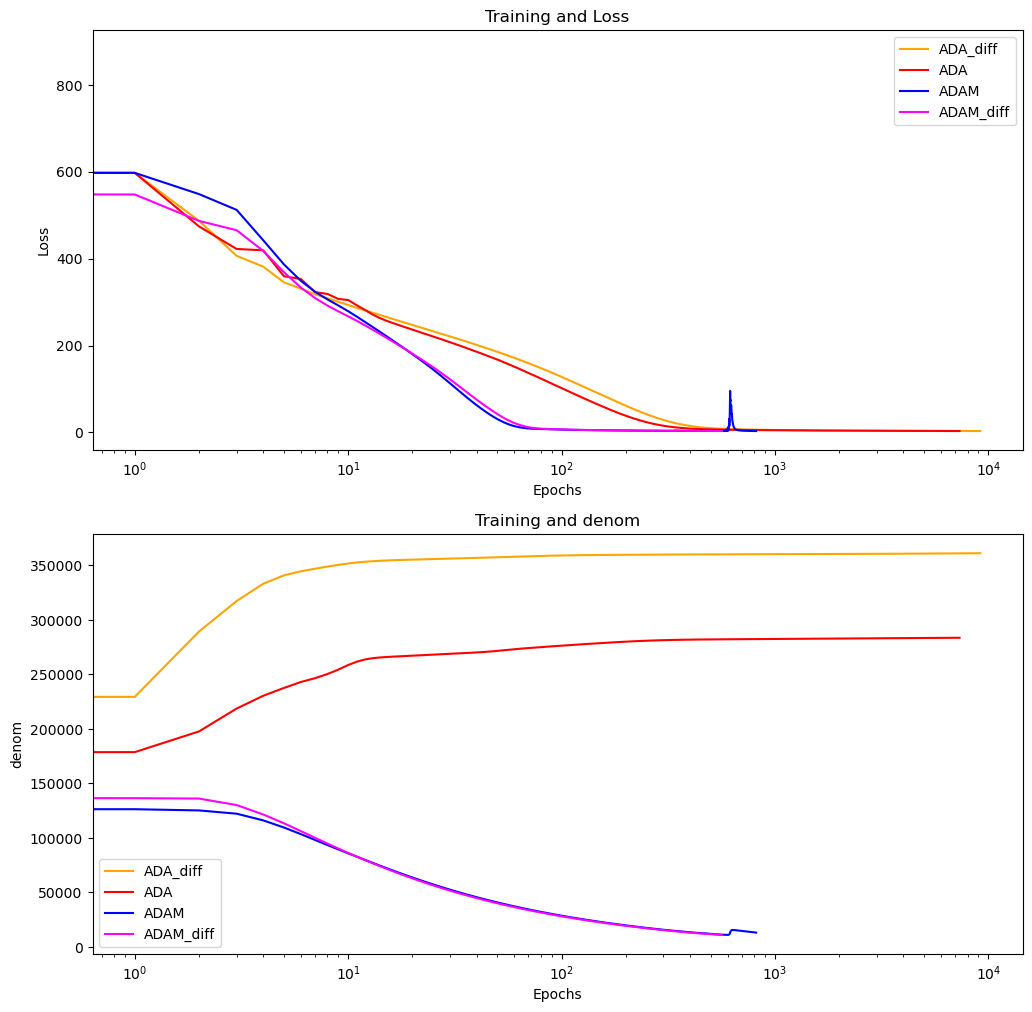

ADADIFF:  time:  399.0887, epoch: 9174, time/epoch: 0.0435
ADA:      time:  323.5971, epoch: 7337, time/epoch:  0.0441
ADAM:     time:  36.2268, epoch: 818, time/epoch:  0.0443
ADAMDIFF: time:  25.8589, epoch: 565, time/epoch:  0.0458


In [39]:
# plt.figure(figsize=(12, 12))

# plt.subplot(2, 1, 1)
# plt.plot(loss_dict_adadiff,label="ADA_diff", color = COLOR_adadiff)
# plt.plot(loss_dict_ada,label="ADA", color = COLOR_ada)
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.title('Adagrad_diff and Adagrad: Training and Loss')
# plt.legend()



# plt.subplot(2, 1, 2)
# plt.plot(loss_dict_adam,label="ADAM", color = COLOR_adam)
# plt.plot(loss_dict_adamdiff,label="ADAM_diff",color = COLOR_adamdiff)
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.title('Adamgrad_diff and Adam: Training and Loss')
# plt.legend()

# plt.show()

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(2,1,1)
plt.plot(loss_dict_adadiff,label="ADA_diff", color = COLOR_adadiff)
plt.plot(loss_dict_ada,label="ADA", color=COLOR_ada)
plt.plot(loss_dict_adam,label="ADAM", color = COLOR_adam)
plt.plot(loss_dict_adamdiff,label="ADAM_diff", color=COLOR_adamdiff)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Loss')
plt.legend()
ax.set_xscale('log')




# fig = plt.figure(figsize=(12, 12))

# ax = fig.add_subplot(2,1,1)
# # denom_adadiff = [v.item() for v in denom_adadiff]
# plt.plot(denom_adadiff,label="ADA_diff", color=COLOR_adadiff)
# plt.plot(denom_ada,label="ADA", color=COLOR_ada)
# plt.xlabel('Epochs')
# plt.ylabel('denom')
# plt.title('Adagrad_diff and Adagrad: Training and denom')
# # ax.set_xscale('log')
# plt.legend()


# plt.subplot(2, 1, 2)
# plt.plot(denom_adam,label="ADAM",color=COLOR_adam)
# plt.plot(denom_adamdiff,label="ADAM_diff",color=COLOR_adamdiff)
# plt.xlabel('Epochs')
# plt.ylabel('denom')
# plt.title('Adamgrad_diff and Adam: Training and denom')
# plt.legend()


# plt.show()

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(2,1,2)
plt.plot(denom_adadiff,label="ADA_diff", color=COLOR_adadiff)
plt.plot(denom_ada,label="ADA", color=COLOR_ada)
plt.plot(denom_adam,label="ADAM", color=COLOR_adam)
plt.plot(denom_adamdiff,label="ADAM_diff", color=COLOR_adamdiff)
plt.xlabel('Epochs')
plt.ylabel('denom')
plt.title('Training and denom')
plt.legend()
ax.set_xscale('log')
# ax.set_yscale('log')
plt.show()
print(f"ADADIFF:  time: {time_adadiff: .4f}, epoch: {epoch_adadiff}, time/epoch: {time_adadiff/epoch_adadiff :.4f}")
print(f"ADA:      time: {time_ada: .4f}, epoch: {epoch_ada}, time/epoch: {time_ada/epoch_ada: .4f}")
print(f"ADAM:     time: {time_adam: .4f}, epoch: {epoch_adam}, time/epoch: {time_adam/epoch_adam: .4f}")
print(f"ADAMDIFF: time: {time_adamdiff: .4f}, epoch: {epoch_adamdiff}, time/epoch: {time_adamdiff/epoch_adamdiff: .4f}")

In [7]:


args.optimizer = LBFGS
args.model = "vgg19_bn"
args.lr = 0.01
args.style_weight = 10000 #700000000
args.content_weight = 1
args.loss_tao = 0.0041


model = ArtNet(args,
                normalization_mean,
                normalization_std,
                style_img,
                content_img)

output_img, loss_dict_LBFGS_bn,epoch_LBFGS, time_LBFGS, denom_LBFGS = model.train(content_img.clone())
print(f"testing for {args.model}, {args.optimizer}")
if not os.path.exists(args.output_path):
    os.mkdir(args.output_path)
save_image(output_img, args.output_path)

==> Building the style transfer model ...
==> Start training ...
Epoch 0: Style Loss : 0.052429 Content Loss: 0.000000
Epoch 0: Style Loss : 0.052427 Content Loss: 0.000000
Epoch 0: Style Loss : 0.034769 Content Loss: 0.011136
Epoch 0: Style Loss : 0.024140 Content Loss: 0.009285
Epoch 0: Style Loss : 0.006432 Content Loss: 0.010566
Epoch 0: Style Loss : 0.002718 Content Loss: 0.009871
Epoch 0: Style Loss : 0.003225 Content Loss: 0.006557
Epoch 0: Style Loss : 0.003632 Content Loss: 0.005111
Epoch 0: Style Loss : 0.003685 Content Loss: 0.004392
Epoch 0: Style Loss : 0.003568 Content Loss: 0.004055
Epoch 0: Style Loss : 0.003422 Content Loss: 0.003936
Epoch 0: Style Loss : 0.003353 Content Loss: 0.003829
Epoch 0: Style Loss : 0.003347 Content Loss: 0.003678
Epoch 0: Style Loss : 0.003375 Content Loss: 0.003508
Epoch 0: Style Loss : 0.003368 Content Loss: 0.003383
Epoch 0: Style Loss : 0.003276 Content Loss: 0.003350
Epoch 0: Style Loss : 0.003144 Content Loss: 0.003364
Epoch 0: Style Lo

In [8]:


args.content_weight = 1
args.style_weight = 1000000
args.optimizer = ADADIFF
args.model = "vgg19_bn"
args.loss_tao = 4

model = ArtNet(args,
                normalization_mean,
                normalization_std,
                style_img,
                content_img)

output_img, loss_dict_adadiff_bn,epoch_adadiff_bn,time_adadiff_bn, denom_adadiff_bn = model.train(content_img.clone())

save_data("adadiff_bn2", output_img, epoch_adadiff_bn, time_adadiff_bn, loss_dict_adadiff_bn, denom_adadiff_bn)


==> Building the style transfer model ...
==> Start training ...
Epoch 0: Style Loss : 524294.500000 Content Loss: 0.000000
Epoch 5: Style Loss : 121117.312500 Content Loss: 2.079516
Epoch 10: Style Loss : 36670.792969 Content Loss: 2.535571
Epoch 15: Style Loss : 15830.020508 Content Loss: 2.741084
Epoch 20: Style Loss : 9640.845703 Content Loss: 2.841843
Epoch 25: Style Loss : 7064.801270 Content Loss: 2.900907
Epoch 30: Style Loss : 5594.253906 Content Loss: 2.941009
Epoch 35: Style Loss : 4599.418945 Content Loss: 2.972459
Epoch 40: Style Loss : 3877.214111 Content Loss: 2.998383
Epoch 45: Style Loss : 3335.581787 Content Loss: 3.020420
Epoch 50: Style Loss : 2920.962891 Content Loss: 3.039289
Epoch 55: Style Loss : 2598.342529 Content Loss: 3.055871
Epoch 60: Style Loss : 2343.486816 Content Loss: 3.070464
Epoch 65: Style Loss : 2139.275146 Content Loss: 3.083408
Epoch 70: Style Loss : 1973.250122 Content Loss: 3.094945
Epoch 75: Style Loss : 1836.346313 Content Loss: 3.105331
Epo

In [2]:


args.content_weight = 1
args.style_weight = 1000000
args.optimizer = ADADIFF
args.model = "vgg19_bn"
args.loss_tao = 0.00000001

model = ArtNet(args,
                normalization_mean,
                normalization_std,
                style_img,
                content_img)

output_img, loss_dict_adadiff_bn,epoch_adadiff_bn,time_adadiff_bn, denom_adadiff_bn = model.train(content_img.clone())

save_data("adadiff_bn2", output_img, epoch_adadiff_bn, time_adadiff_bn, loss_dict_adadiff_bn, denom_adadiff_bn)


==> Building the style transfer model ...


d:\Gitte_Belly\Desktop\test\neural-style-pytorch-master\neural-style-pytorch-master\src\utils.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.mean = torch.tensor(mean).view(-1, 1, 1)
d:\Gitte_Belly\Desktop\test\neural-style-pytorch-master\neural-style-pytorch-master\src\utils.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.std = torch.tensor(std).view(-1, 1, 1)


==> Start training ...
Epoch 0: Style Loss : 5.242945 Content Loss: 0.000000


d:\Gitte_Belly\Desktop\test\neural-style-pytorch-master\neural-style-pytorch-master\src\optimizer.py:266: UserWarning: This overload of addcdiv_ is deprecated:
	addcdiv_(Number value, Tensor tensor1, Tensor tensor2)
Consider using one of the following signatures instead:
	addcdiv_(Tensor tensor1, Tensor tensor2, *, Number value) (Triggered internally at C:\cb\pytorch_1000000000000\work\torch\csrc\utils\python_arg_parser.cpp:1519.)
  p.data.addcdiv_(-group['lr'], grad, denom)


Epoch 5: Style Loss : 1.218340 Content Loss: 0.018216
Epoch 10: Style Loss : 0.372367 Content Loss: 0.021056
Epoch 15: Style Loss : 0.161818 Content Loss: 0.021789
Epoch 20: Style Loss : 0.099188 Content Loss: 0.021726
Epoch 25: Style Loss : 0.073292 Content Loss: 0.021425
Epoch 30: Style Loss : 0.058593 Content Loss: 0.021066
Epoch 35: Style Loss : 0.048649 Content Loss: 0.020708
Epoch 40: Style Loss : 0.041398 Content Loss: 0.020369
Epoch 45: Style Loss : 0.035926 Content Loss: 0.020057
Epoch 50: Style Loss : 0.031710 Content Loss: 0.019770
Epoch 55: Style Loss : 0.028409 Content Loss: 0.019507
Epoch 60: Style Loss : 0.025789 Content Loss: 0.019265
Epoch 65: Style Loss : 0.023681 Content Loss: 0.019043
Epoch 70: Style Loss : 0.021963 Content Loss: 0.018838
Epoch 75: Style Loss : 0.020546 Content Loss: 0.018647
Epoch 80: Style Loss : 0.019361 Content Loss: 0.018471
Epoch 85: Style Loss : 0.018359 Content Loss: 0.018308
Epoch 90: Style Loss : 0.017500 Content Loss: 0.018156
Epoch 95: S

KeyboardInterrupt: 

In [3]:

args.optimizer = ADAM
args.model = "vgg19_bn"
args.content_weight = 1
args.style_weight = 1000000
args.loss_tao = 0.00001
model = ArtNet(args,
                normalization_mean,
                normalization_std,
                style_img,
                content_img)

output_img, loss_dict_adam_bn,epoch_adam_bn,time_adam_bn,denom_adam_bn = model.train(content_img.clone())
print(f"testing for {args.model}, {args.optimizer}")
save_data("adam_bn2", output_img, epoch_adam_bn, time_adam_bn, loss_dict_adam_bn, denom_adam_bn)

==> Building the style transfer model ...
==> Start training ...
Epoch 0: Style Loss : 5.242945 Content Loss: 0.000000


d:\Gitte_Belly\Desktop\test\neural-style-pytorch-master\neural-style-pytorch-master\src\utils.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.mean = torch.tensor(mean).view(-1, 1, 1)
d:\Gitte_Belly\Desktop\test\neural-style-pytorch-master\neural-style-pytorch-master\src\utils.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.std = torch.tensor(std).view(-1, 1, 1)


Epoch 5: Style Loss : 4.454856 Content Loss: 0.002923
Epoch 10: Style Loss : 3.778389 Content Loss: 0.008559
Epoch 15: Style Loss : 3.192874 Content Loss: 0.012852
Epoch 20: Style Loss : 2.681124 Content Loss: 0.015208
Epoch 25: Style Loss : 2.235725 Content Loss: 0.016222
Epoch 30: Style Loss : 1.851128 Content Loss: 0.016604
Epoch 35: Style Loss : 1.521464 Content Loss: 0.016907
Epoch 40: Style Loss : 1.241127 Content Loss: 0.017354
Epoch 45: Style Loss : 1.005302 Content Loss: 0.017882
Epoch 50: Style Loss : 0.809605 Content Loss: 0.018321
Epoch 55: Style Loss : 0.649331 Content Loss: 0.018568
Epoch 60: Style Loss : 0.519638 Content Loss: 0.018642
Epoch 65: Style Loss : 0.415947 Content Loss: 0.018645
Epoch 70: Style Loss : 0.334055 Content Loss: 0.018662
Epoch 75: Style Loss : 0.270134 Content Loss: 0.018724
Epoch 80: Style Loss : 0.220775 Content Loss: 0.018803
Epoch 85: Style Loss : 0.183011 Content Loss: 0.018859
Epoch 90: Style Loss : 0.154300 Content Loss: 0.018872
Epoch 95: S

KeyboardInterrupt: 

In [3]:
args.optimizer = ADAMDIFF
args.model = "vgg19_bn"
args.content_weight = 100
args.style_weight = 100000000000
args.loss_tao = 4

model = ArtNet(args,
                normalization_mean,
                normalization_std,
                style_img,
                content_img)

output_img, loss_dict_adamdiff_bn, epoch_adamdiff_bn, time_adamdiff_bn, denom_adamdiff_bn = model.train(content_img.clone())
print(f"testing for {args.model}, {args.optimizer}")
if not os.path.exists(args.output_path):
    os.mkdir(args.output_path)
save_image(output_img, args.output_path)

save_data("adamdiff_bn", output_img, epoch_adamdiff_bn, time_adamdiff_bn, loss_dict_adamdiff_bn, denom_adamdiff_bn)

==> Building the style transfer model ...
==> Start training ...


d:\Gitte_Belly\Desktop\test\neural-style-pytorch-master\neural-style-pytorch-master\src\utils.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.mean = torch.tensor(mean).view(-1, 1, 1)
d:\Gitte_Belly\Desktop\test\neural-style-pytorch-master\neural-style-pytorch-master\src\utils.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.std = torch.tensor(std).view(-1, 1, 1)


Epoch 0: Style Loss : 524294.500000 Content Loss: 0.000000
Epoch 5: Style Loss : 400628.500000 Content Loss: 0.639190
Epoch 10: Style Loss : 254276.500000 Content Loss: 1.852487
Epoch 15: Style Loss : 135373.625000 Content Loss: 2.373555
Epoch 20: Style Loss : 58271.835938 Content Loss: 2.457451
Epoch 25: Style Loss : 21810.119141 Content Loss: 2.539320
Epoch 30: Style Loss : 12084.531250 Content Loss: 2.692439
Epoch 35: Style Loss : 13052.994141 Content Loss: 2.818611
Epoch 40: Style Loss : 13900.432617 Content Loss: 2.856966
Epoch 45: Style Loss : 11587.119141 Content Loss: 2.834217
Epoch 50: Style Loss : 7836.899902 Content Loss: 2.806481
Epoch 55: Style Loss : 4897.319824 Content Loss: 2.798993
Epoch 60: Style Loss : 3486.734375 Content Loss: 2.804006
Epoch 65: Style Loss : 3039.230957 Content Loss: 2.811010
Epoch 70: Style Loss : 2820.897461 Content Loss: 2.818726
Epoch 75: Style Loss : 2524.474609 Content Loss: 2.828752
Epoch 80: Style Loss : 2189.729980 Content Loss: 2.842308
Ep

In [2]:
args.optimizer = ADA
args.model = "vgg19_bn"
args.content_weight = 100
args.style_weight = 100000000000
args.loss_tao = 4

model = ArtNet(args,
                normalization_mean,
                normalization_std,
                style_img,
                content_img)

output_img, loss_dict_ada_bn,epoch_ada_bn,time_ada_bn,denom_ada_bn = model.train(content_img.clone())
print(f"testing for {args.model}, {args.optimizer}")
save_data("ada_bn", output_img, epoch_ada_bn, time_ada_bn, loss_dict_ada_bn, denom_ada_bn)

==> Building the style transfer model ...


d:\Gitte_Belly\Desktop\test\neural-style-pytorch-master\neural-style-pytorch-master\src\utils.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.mean = torch.tensor(mean).view(-1, 1, 1)
d:\Gitte_Belly\Desktop\test\neural-style-pytorch-master\neural-style-pytorch-master\src\utils.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.std = torch.tensor(std).view(-1, 1, 1)


==> Start training ...
Epoch 0: Style Loss : 524294.500000 Content Loss: 0.000000


d:\Gitte_Belly\Desktop\test\neural-style-pytorch-master\neural-style-pytorch-master\src\optimizer.py:333: UserWarning: This overload of addcdiv_ is deprecated:
	addcdiv_(Number value, Tensor tensor1, Tensor tensor2)
Consider using one of the following signatures instead:
	addcdiv_(Tensor tensor1, Tensor tensor2, *, Number value) (Triggered internally at C:\cb\pytorch_1000000000000\work\torch\csrc\utils\python_arg_parser.cpp:1519.)
  p.data.addcdiv_(-group['lr'], grad, denom)


Epoch 5: Style Loss : 180460.203125 Content Loss: 1.816725
Epoch 10: Style Loss : 93587.890625 Content Loss: 2.129497
Epoch 15: Style Loss : 53961.062500 Content Loss: 2.290960
Epoch 20: Style Loss : 33569.578125 Content Loss: 2.389066
Epoch 25: Style Loss : 22442.279297 Content Loss: 2.454957
Epoch 30: Style Loss : 16090.728516 Content Loss: 2.501818
Epoch 35: Style Loss : 12290.689453 Content Loss: 2.536818
Epoch 40: Style Loss : 9891.735352 Content Loss: 2.564107
Epoch 45: Style Loss : 8284.710938 Content Loss: 2.586063
Epoch 50: Style Loss : 7141.510742 Content Loss: 2.604294
Epoch 55: Style Loss : 6282.748047 Content Loss: 2.619698
Epoch 60: Style Loss : 5607.787598 Content Loss: 2.633058
Epoch 65: Style Loss : 5058.593262 Content Loss: 2.644882
Epoch 70: Style Loss : 4600.279785 Content Loss: 2.655433
Epoch 75: Style Loss : 4210.825684 Content Loss: 2.665004
Epoch 80: Style Loss : 3875.660156 Content Loss: 2.673740
Epoch 85: Style Loss : 3584.504639 Content Loss: 2.681843
Epoch 9

In [2]:
epoch_adadiff_bn, time_adadiff_bn, denom_adadiff_bn, loss_dict_adadiff_bn = read_data("adadiff_bn")
epoch_ada_bn, time_ada_bn, denom_ada_bn, loss_dict_ada_bn = read_data("ada_bn")
epoch_adam_bn, time_adam_bn, denom_adam_bn, loss_dict_adam_bn = read_data("adam_bn")
epoch_adamdiff_bn, time_adamdiff_bn, denom_adamdiff_bn, loss_dict_adamdiff_bn = read_data("adamdiff_bn")

load data for adadiff_bn
load data for ada_bn
load data for adam_bn
load data for adamdiff_bn


load data for adadiff
load data for ada
load data for adam
load data for adamdiff
load data for adadiff_bn
load data for ada_bn
load data for adam_bn
load data for adamdiff_bn
ADADIFF:  time:  4348.0529, epoch: 91176, time/epoch: 0.0477
ADA:      time:  7597.2777, epoch: 153591, time/epoch:  0.0495
ADAM:     time:  395.0088, epoch: 8107, time/epoch:  0.0487
ADAMDIFF: time:  255.8710, epoch: 5347, time/epoch:  0.0479


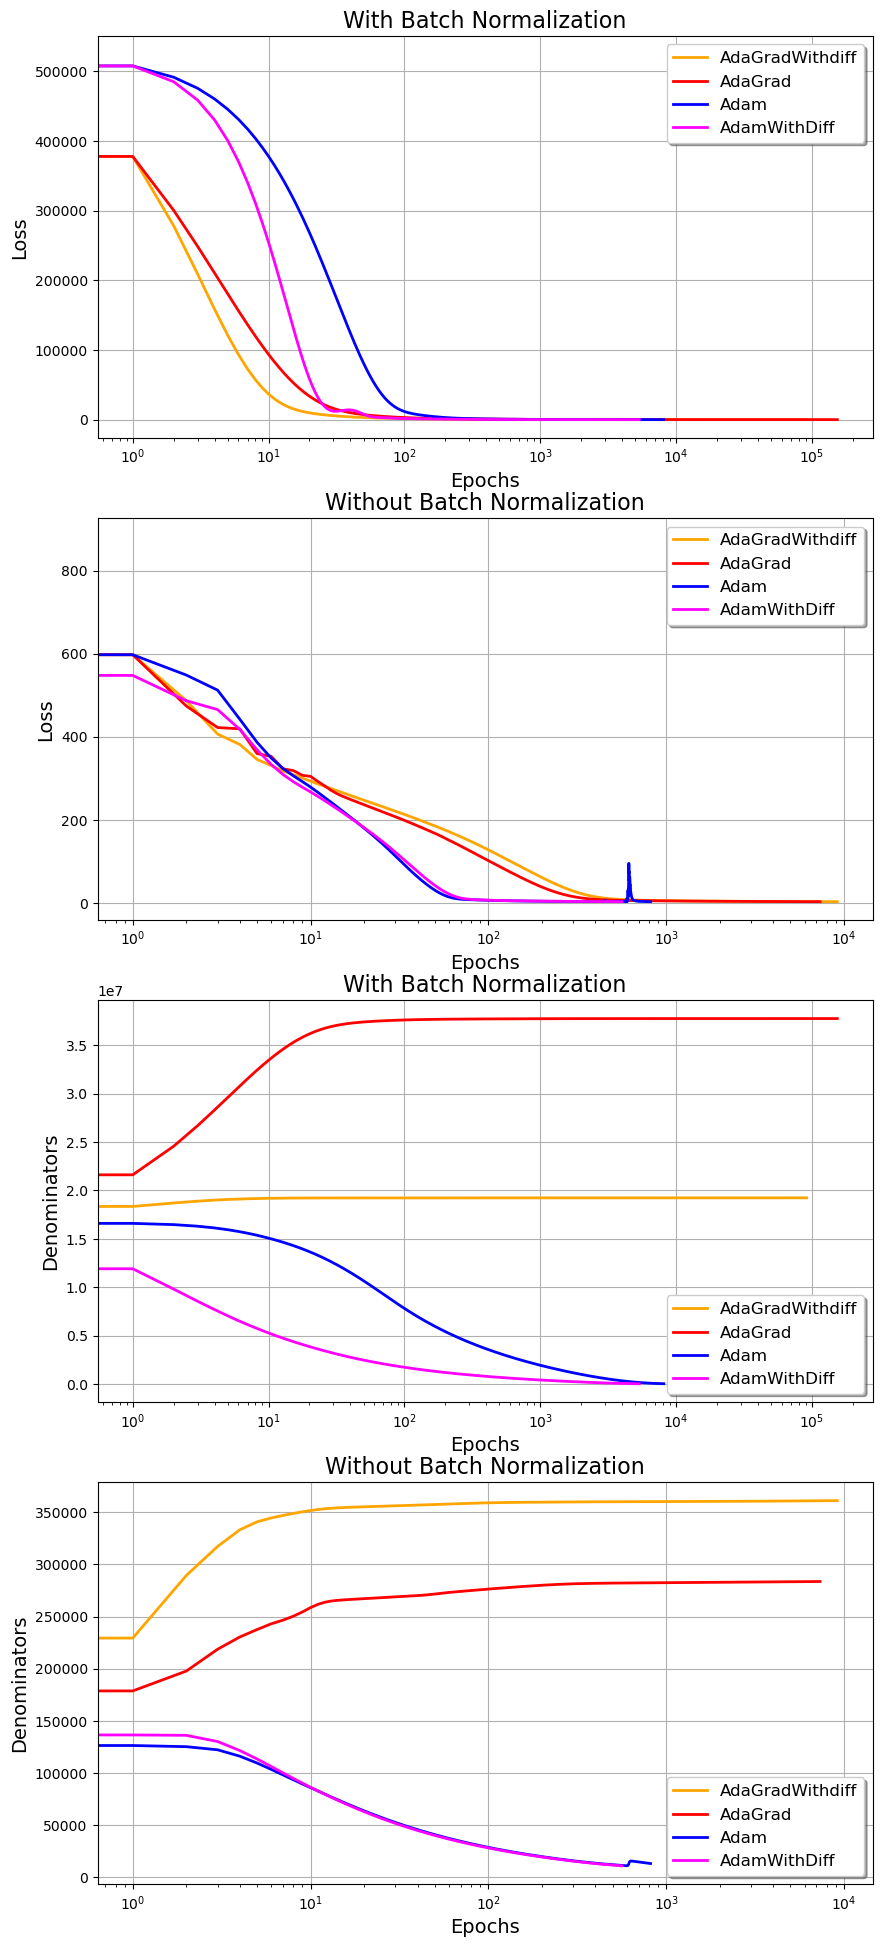

In [3]:
epoch_adadiff, time_adadiff, denom_adadiff, loss_dict_adadiff = read_data("adadiff")
epoch_ada, time_ada, denom_ada, loss_dict_ada = read_data("ada")
epoch_adam, time_adam, denom_adam, loss_dict_adam = read_data("adam")
epoch_adamdiff, time_adamdiff, denom_adamdiff, loss_dict_adamdiff = read_data("adamdiff")
epoch_adadiff_bn, time_adadiff_bn, denom_adadiff_bn, loss_dict_adadiff_bn = read_data("adadiff_bn")
epoch_ada_bn, time_ada_bn, denom_ada_bn, loss_dict_ada_bn = read_data("ada_bn")
epoch_adam_bn, time_adam_bn, denom_adam_bn, loss_dict_adam_bn = read_data("adam_bn")
epoch_adamdiff_bn, time_adamdiff_bn, denom_adamdiff_bn, loss_dict_adamdiff_bn = read_data("adamdiff_bn")

# fig = plt.figure(figsize=(12, 12))
# ax = fig.add_subplot(2, 1, 1)
# plt.plot(loss_dict_adadiff_bn,label="ADA_diff", color = 'orange')
# plt.plot(loss_dict_ada_bn,label="ADA", color = 'red')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# ax.set_xscale('log')
# plt.title('Adagrad_diff and Adagrad BN: Training and Loss')
# plt.legend()

# ax = fig.add_subplot(2, 1, 2)
# plt.plot(loss_dict_adam_bn,label="ADAM", color = 'blue')
# plt.plot(loss_dict_adamdiff_bn,label="ADAM_diff", color='magenta')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.title('Adamgrad_diff and Adam BN: Training and Loss')
# ax.set_xscale('log')
# plt.legend()

# plt.show()
LINEWIDTH = 2

print(f"ADADIFF:  time: {time_adadiff_bn: .4f}, epoch: {epoch_adadiff_bn}, time/epoch: {time_adadiff_bn/epoch_adadiff_bn :.4f}")
print(f"ADA:      time: {time_ada_bn: .4f}, epoch: {epoch_ada_bn}, time/epoch: {time_ada_bn/epoch_ada_bn: .4f}")
print(f"ADAM:     time: {time_adam_bn: .4f}, epoch: {epoch_adam_bn}, time/epoch: {time_adam_bn/epoch_adam_bn: .4f}")
print(f"ADAMDIFF: time: {time_adamdiff_bn: .4f}, epoch: {epoch_adamdiff_bn}, time/epoch: {time_adamdiff_bn/epoch_adamdiff_bn: .4f}")

fig = plt.figure(figsize=(10,24))
ax = fig.add_subplot(4,1,1)
plt.plot(loss_dict_adadiff_bn,label="AdaGradWithdiff", color = 'orange', linewidth=LINEWIDTH)
plt.plot(loss_dict_ada_bn,label="AdaGrad", color = 'red', linewidth=LINEWIDTH)
plt.plot(loss_dict_adam_bn,label="Adam", color = 'blue', linewidth=LINEWIDTH)
plt.plot(loss_dict_adamdiff_bn,label="AdamWithDiff", color='magenta', linewidth=LINEWIDTH)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('With Batch Normalization', fontsize=16)
plt.legend(loc='upper right', fontsize=12, frameon=True, shadow=True)
ax.set_xscale('log')
plt.grid(True)


ax = fig.add_subplot(4,1,2)
plt.plot(loss_dict_adadiff,label="AdaGradWithdiff", color = COLOR_adadiff, linewidth=LINEWIDTH)
plt.plot(loss_dict_ada,label="AdaGrad", color=COLOR_ada, linewidth=LINEWIDTH)
plt.plot(loss_dict_adam,label="Adam", color = COLOR_adam, linewidth=LINEWIDTH)
plt.plot(loss_dict_adamdiff,label="AdamWithDiff", color=COLOR_adamdiff, linewidth=LINEWIDTH)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('Without Batch Normalization', fontsize=16)
plt.legend(loc='upper right', fontsize=12, frameon=True, shadow=True)
ax.set_xscale('log')
plt.grid(True)


# plt.show()

# fig = plt.figure(figsize=(12, 12))

# ax = fig.add_subplot(2,1,1)
# plt.plot(denom_adadiff_bn,label="ADA_diff", color = 'orange')
# plt.plot(denom_ada_bn,label="ADA", color = 'red')
# plt.xlabel('Epochs')
# plt.ylabel('denom')
# ax.set_xscale('log')
# ax.set_yscale('log')
# plt.title('Adagrad_diff and Adagrad BN: Training and denom')
# plt.legend()

# plt.subplot(2, 1, 2)
# plt.plot(denom_adam_bn,label="ADAM", color = 'blue')
# plt.plot(denom_adamdiff_bn,label="ADAM_diff", color='magenta')
# plt.xlabel('Epochs')
# plt.ylabel('denom')
# ax.set_xscale('log')
# ax.set_yscale('linear')
# plt.title('Adamgrad_diff and Adam BN: Training and denom')
# plt.legend()

# plt.show()

# fig = plt.figure(figsize=(12,10))/
ax = fig.add_subplot(4,1,3)
plt.plot(denom_adadiff_bn,label="AdaGradWithdiff", color = 'orange', linewidth=LINEWIDTH)
plt.plot(denom_ada_bn,label="AdaGrad", color = 'red', linewidth=LINEWIDTH)
plt.plot(denom_adam_bn,label="Adam", color = 'blue', linewidth=LINEWIDTH)
plt.plot(denom_adamdiff_bn,label="AdamWithDiff", color='magenta', linewidth=LINEWIDTH)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Denominators', fontsize=14)
plt.title('With Batch Normalization', fontsize=16)
plt.legend(loc='lower right', fontsize=12, frameon=True, shadow=True)
ax.set_xscale('log')
plt.grid(True)


ax = fig.add_subplot(4,1,4)
plt.plot(denom_adadiff,label="AdaGradWithdiff", color=COLOR_adadiff, linewidth=LINEWIDTH)
plt.plot(denom_ada,label="AdaGrad", color=COLOR_ada, linewidth=LINEWIDTH)
plt.plot(denom_adam,label="Adam", color=COLOR_adam, linewidth=LINEWIDTH)
plt.plot(denom_adamdiff,label="AdamWithDiff", color=COLOR_adamdiff, linewidth=LINEWIDTH)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Denominators', fontsize=14)
plt.title('Without Batch Normalization', fontsize=16)
plt.legend(loc='lower right', fontsize=12, frameon=True, shadow=True)
ax.set_xscale('log')
plt.grid(True)

plt.show()

# group = ['']

load data for adadiff
load data for ada
load data for adam
load data for adamdiff
load data for adadiff_bn
load data for ada_bn
load data for adam_bn
load data for adamdiff_bn


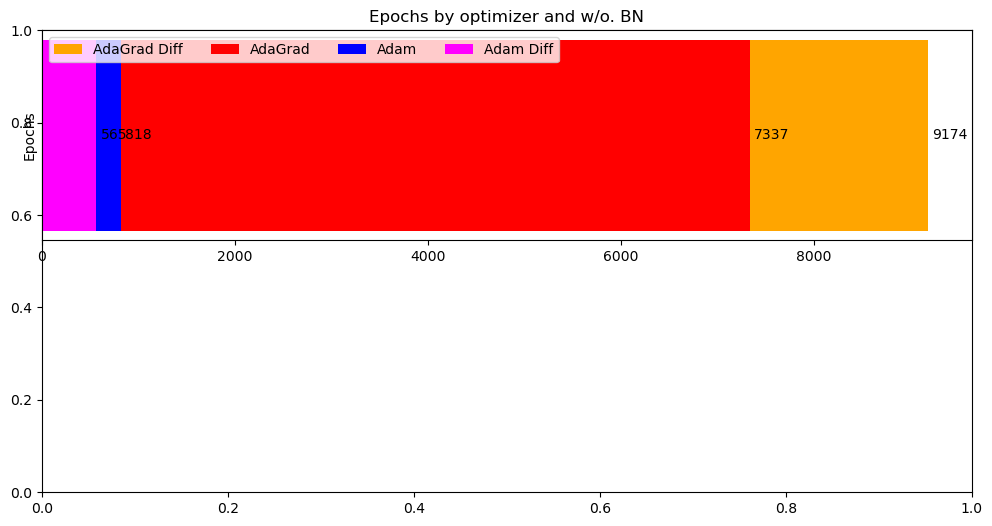

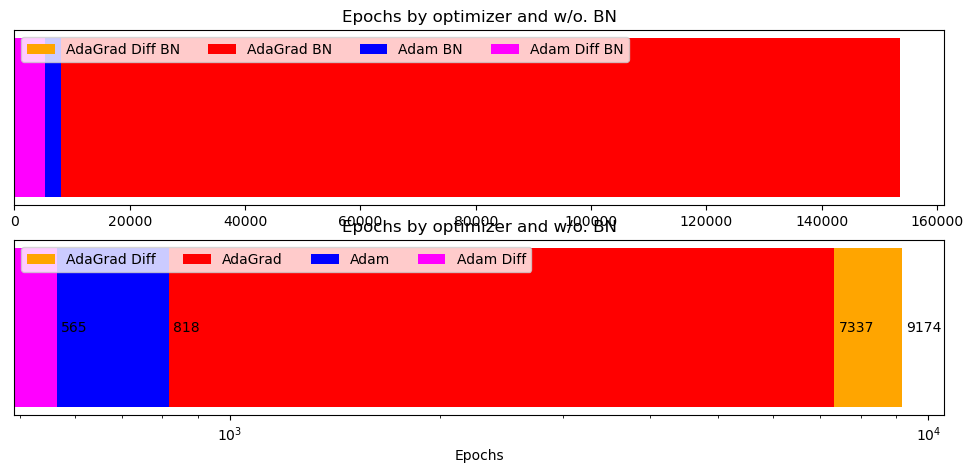

In [9]:
epoch_adadiff, time_adadiff, denom_adadiff, loss_dict_adadiff = read_data("adadiff")
epoch_ada, time_ada, denom_ada, loss_dict_ada = read_data("ada")
epoch_adam, time_adam, denom_adam, loss_dict_adam = read_data("adam")
epoch_adamdiff, time_adamdiff, denom_adamdiff, loss_dict_adamdiff = read_data("adamdiff")
epoch_adadiff_bn, time_adadiff_bn, denom_adadiff_bn, loss_dict_adadiff_bn = read_data("adadiff_bn")
epoch_ada_bn, time_ada_bn, denom_ada_bn, loss_dict_ada_bn = read_data("ada_bn")
epoch_adam_bn, time_adam_bn, denom_adam_bn, loss_dict_adam_bn = read_data("adam_bn")
epoch_adamdiff_bn, time_adamdiff_bn, denom_adamdiff_bn, loss_dict_adamdiff_bn = read_data("adamdiff_bn")

import numpy as np
# group = ("w.o BN")
epochs = {
    'AdaGrad Diff': (epoch_adadiff),
    'AdaGrad': (epoch_ada),
    'Adam': (epoch_adam),
    'Adam Diff': (epoch_adamdiff)
} 
colors = [COLOR_adadiff, COLOR_ada, COLOR_adam, COLOR_adamdiff]

x = np.arange(1)  # the label locations
width = 0.2
multiplier = -0.5

fig,ax = plt.subplots(figsize=(12,6))
ax = fig.add_subplot(2,1,1)
for i, (attr, opt) in enumerate(epochs.items()):
    offset = width * multiplier
    # rects = ax.bar(x + offset, opt, width, label=attr, color = colors[i])
    rects = ax.barh(x , opt, width, label=attr, color = colors[i])
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('Epochs')
ax.set_title('Epochs by optimizer and w/o. BN')
ax.set_yticks([])
ax.legend(loc='upper left',ncols = 4)

plt.show()


fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(2,1,1)
epochs = {
    'AdaGrad Diff BN': (epoch_adadiff_bn),
    'AdaGrad BN': (epoch_ada_bn),
    'Adam BN': (epoch_adam_bn),
    'Adam Diff BN': (epoch_adamdiff_bn)
}
for i, (attr, opt) in enumerate(epochs.items()):
    # offset = width * multiplier
    # rects = ax.bar(x + offset, opt, width, label=attr, color = colors[i])
    rects = ax.barh(x , opt, label=attr, color = colors[i])
    # ax.bar_label(rects, padding=3)
    multiplier += 1

# ax.set_xlabel('Epochs')
ax.set_title('Epochs by optimizer and w/o. BN')
ax.set_yticks([])
ax.legend(loc='upper left',ncols = 4)


ax = fig.add_subplot(2,1,2)
epochs ={
    'AdaGrad Diff': (epoch_adadiff),
    'AdaGrad': (epoch_ada),
    'Adam': (epoch_adam),
    'Adam Diff': (epoch_adamdiff)

}
for i, (attr, opt) in enumerate(epochs.items()):
    # offset = width * multiplier
    # rects = ax.bar(x + offset, opt, width, label=attr, color = colors[i])
    rects = ax.barh(x , opt, label=attr, color = colors[i])
    # ax.bar_label(rects, padding=3)4
    ax.bar_label(hbars)
    multiplier += 1

ax.set_xlabel('Epochs')
ax.set_title('Epochs by optimizer and w/o. BN')
ax.set_yticks([])
ax.set_xscale('log')
ax.legend(loc='upper left',ncols = 4)
plt.show()

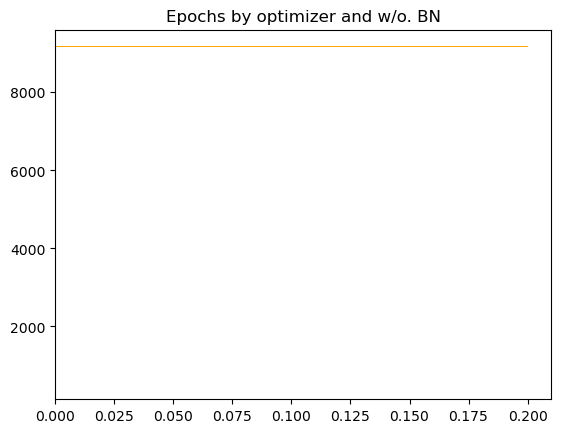

In [12]:
# fig,ax = plt.subplots(layout='constrained')

plt.barh(epoch_ada, width, color = COLOR_ada)
plt.barh(epoch_adadiff, width, color = COLOR_adadiff)
plt.barh(epoch_adam, width, color = COLOR_adam)
plt.barh(epoch_adamdiff, width, color = COLOR_adamdiff)

    # ax.bar_label(rects, padding=3)

plt.title('Epochs by optimizer and w/o. BN')
# ax.legend(loc='upper left',ncols = 4)
plt.show()